In [20]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def monte_carlo_control(env, num_episodes=5000, gamma=0.99, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)

    for episode in range(num_episodes):
        state, _ = env.reset()  # Extract only the observation
        done = False
        episode_data = []

        while not done:
            action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[state])
            next_state, reward, done, _ = env.step(action)
            episode_data.append((state, action, reward))
            state = next_state

        G = 0
        visited = set()
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            if (state, action) not in visited:
                visited.add((state, action))
                returns[(state, action)].append(G)
                Q[state][action] = np.mean(returns[(state, action)])

    policy = {s: np.argmax(Q[s]) for s in range(env.observation_space.n)}
    return policy

def evaluate_policy(env, policy, num_episodes=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()  # Extract only the observation
        done = False
        total_reward = 0
        while not done:
            action = policy[state]
            state, reward, done, _ = env.step(action)
            total_reward += reward
        total_rewards.append(total_reward)
    average_reward = np.mean(total_rewards)
    print(f"Average Reward over {num_episodes} episodes: {average_reward}")
    return total_rewards




In [21]:
# Initialize Environment
env = gym.make("Taxi-v3")
print("Training Monte Carlo Policy...")
mc_policy = monte_carlo_control(env)
print("Monte Carlo Training Complete.")

print("Evaluating Policy...")
rewards = evaluate_policy(env, mc_policy)

# Visualization
plt.hist(rewards, bins=range(min(rewards), max(rewards) + 1, 1), edgecolor='black')
plt.title("Distribution of Rewards over Evaluation Episodes")
plt.xlabel("Total Reward per Episode")
plt.ylabel("Frequency")
plt.show()

Training Monte Carlo Policy...


ValueError: too many values to unpack (expected 4)

In [19]:
def monte_carlo_control(env, num_episodes=50000, gamma=0.99, epsilon=0.1):
    """Monte Carlo Control using Exploring Starts"""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))  # Action-value function
    returns = defaultdict(list)

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_data = []

        # Generate an episode
        while not done:
            action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[state])
            next_state, reward, terminated, truncated, info = env.step(action)  # Note the change here
            done = terminated or truncated
            episode_data.append((state, action, reward))
            state = next_state

        # Compute returns and update Q-values
        G = 0
        visited = set()
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            if (state, action) not in visited:
                visited.add((state, action))
                returns[(state, action)].append(G)
                Q[state][action] = np.mean(returns[(state, action)])

    # Extract optimal policy
    policy = {s: np.argmax(Q[s]) for s in range(env.observation_space.n)}
    return policy


Training Monte Carlo Policy...
Monte Carlo Training Complete.
Evaluating Policy...
Average Reward over 100 episodes: -486.83


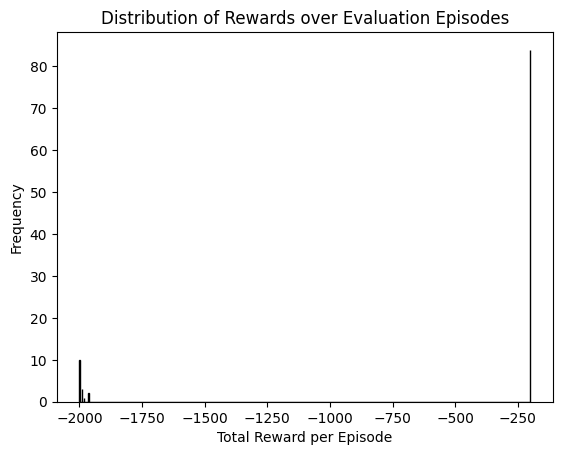

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def monte_carlo_control(env, num_episodes=500, gamma=0.99, epsilon=0.1):
    """Monte Carlo Control with Epsilon-Greedy Exploration"""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_data = []

        # Generate an episode
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            episode_data.append((state, action, reward))
            state = next_state

        # Calculate returns for each step in reverse
        G = 0
        returns_to_go = []
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            returns_to_go.insert(0, G)  # Maintain order from start to end

        # Update Q-values using first-visit MC
        visited = set()
        for t in range(len(episode_data)):
            state, action, _ = episode_data[t]
            sa = (state, action)
            if sa not in visited:
                visited.add(sa)
                returns[sa].append(returns_to_go[t])
                Q[state][action] = np.mean(returns[sa])

    # Derive the optimal policy
    policy = {s: np.argmax(Q[s]) for s in range(env.observation_space.n)}
    return policy

def evaluate_policy(env, policy, num_episodes=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = policy[state]
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
            state = next_state
        total_rewards.append(total_reward)
    average_reward = np.mean(total_rewards)
    print(f"Average Reward over {num_episodes} episodes: {average_reward}")
    return total_rewards

# Initialize Environment
env = gym.make("Taxi-v3")
print("Training Monte Carlo Policy...")
mc_policy = monte_carlo_control(env)
print("Monte Carlo Training Complete.")

print("Evaluating Policy...")
rewards = evaluate_policy(env, mc_policy)

# Visualization
plt.hist(rewards, bins=range(min(rewards), max(rewards) + 1), edgecolor='red')
plt.title("Distribution of Rewards over Evaluation Episodes")
plt.xlabel("Total Reward per Episode")
plt.ylabel("Frequency")
plt.show()

Training Monte Carlo Policy...
Monte Carlo Training Complete.
Evaluating Policy...
Average Reward over 100 episodes: -176.97


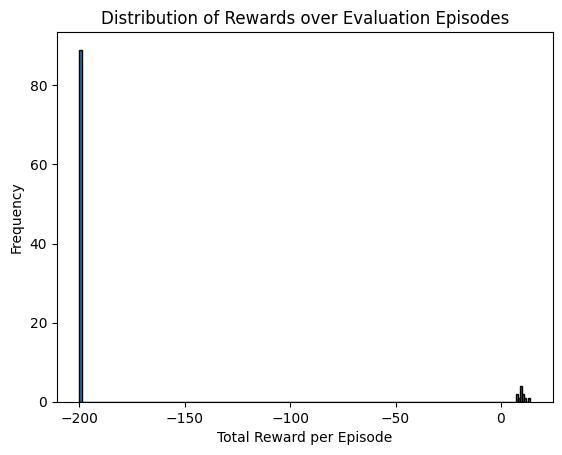

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def monte_carlo_control(env, num_episodes=5000, gamma=0.99, epsilon=0.1):
    """Monte Carlo Control with Epsilon-Greedy Exploration"""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_data = []

        # Generate an episode
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            episode_data.append((state, action, reward))
            state = next_state

        # Calculate returns for each step in reverse
        G = 0
        returns_to_go = []
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            returns_to_go.insert(0, G)  # Maintain order from start to end

        # Update Q-values using first-visit MC
        visited = set()
        for t in range(len(episode_data)):
            state, action, _ = episode_data[t]
            sa = (state, action)
            if sa not in visited:
                visited.add(sa)
                returns[sa].append(returns_to_go[t])
                Q[state][action] = np.mean(returns[sa])

    # Derive the optimal policy
    policy = {s: np.argmax(Q[s]) for s in range(env.observation_space.n)}
    return policy

def evaluate_policy(env, policy, num_episodes=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = policy[state]
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
            state = next_state
        total_rewards.append(total_reward)
    average_reward = np.mean(total_rewards)
    print(f"Average Reward over {num_episodes} episodes: {average_reward}")
    return total_rewards

# Initialize Environment
env = gym.make("Taxi-v3")
print("Training Monte Carlo Policy...")
mc_policy = monte_carlo_control(env)
print("Monte Carlo Training Complete.")

print("Evaluating Policy...")
rewards = evaluate_policy(env, mc_policy)

# Visualization
plt.hist(rewards, bins=range(min(rewards), max(rewards) + 1), edgecolor='blue')
plt.title("Distribution of Rewards over Evaluation Episodes")
plt.xlabel("Total Reward per Episode")
plt.ylabel("Frequency")
plt.show()

Training Monte Carlo Policy...
Monte Carlo Training Complete.
Evaluating Policy...
Average Reward over 100 episodes: -200.0


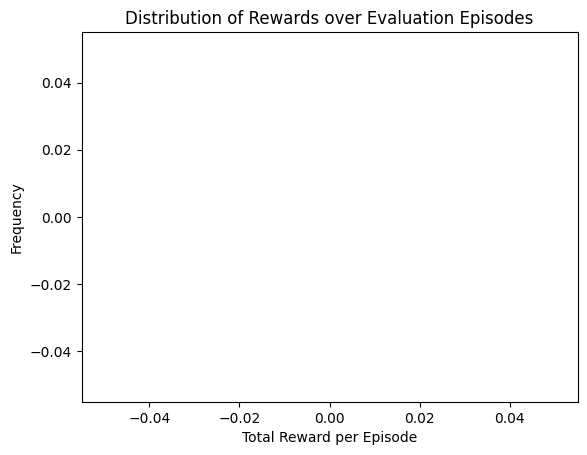

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def monte_carlo_control(env, num_episodes=10000, gamma=0.99, epsilon=0.1):
    """Monte Carlo Control with Epsilon-Greedy Exploration"""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_data = []

        # Generate an episode
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            episode_data.append((state, action, reward))
            state = next_state

        # Calculate returns for each step in reverse
        G = 0
        returns_to_go = []
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            returns_to_go.insert(0, G)  # Maintain order from start to end

        # Update Q-values using first-visit MC
        visited = set()
        for t in range(len(episode_data)):
            state, action, _ = episode_data[t]
            sa = (state, action)
            if sa not in visited:
                visited.add(sa)
                returns[sa].append(returns_to_go[t])
                Q[state][action] = np.mean(returns[sa])

    # Derive the optimal policy
    policy = {s: np.argmax(Q[s]) for s in range(env.observation_space.n)}
    return policy

def evaluate_policy(env, policy, num_episodes=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = policy[state]
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
            state = next_state
        total_rewards.append(total_reward)
    average_reward = np.mean(total_rewards)
    print(f"Average Reward over {num_episodes} episodes: {average_reward}")
    return total_rewards

# Initialize Environment
env = gym.make("Taxi-v3")
print("Training Monte Carlo Policy...")
mc_policy = monte_carlo_control(env)
print("Monte Carlo Training Complete.")

print("Evaluating Policy...")
rewards = evaluate_policy(env, mc_policy)

# Visualization
plt.hist(rewards, bins=range(min(rewards), max(rewards) + 1), edgecolor='black')
plt.title("Distribution of Rewards over Evaluation Episodes")
plt.xlabel("Total Reward per Episode")
plt.ylabel("Frequency")
plt.show()

In [7]:
def q_learning(env, num_episodes=10000, gamma=0.99, alpha=0.1, epsilon=0.1):
    """Q-Learning with Epsilon-Greedy Exploration"""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Q-Value update with bootstrapping
            td_target = reward + gamma * np.max(Q[next_state])
            Q[state][action] += alpha * (td_target - Q[state][action])
            
            state = next_state
    
    policy = {s: np.argmax(Q[s]) for s in Q}
    return policy

In [8]:
def value_iteration(env, gamma=0.99, theta=1e-6):
    """Value Iteration (requires known environment dynamics)"""
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    V = np.zeros(n_states)
    
    while True:
        delta = 0
        for s in range(n_states):
            v_old = V[s]
            q_sa = np.zeros(n_actions)
            for a in range(n_actions):
                # Requires transition model: P(s',r|s,a)
                # Taxi-v3 doesn't provide this, so we'd need to estimate it
                # This is a placeholder to illustrate the logic
                transitions = env.unwrapped.P[s][a]  # Hypothetical access
                for prob, next_s, r, _ in transitions:
                    q_sa[a] += prob * (r + gamma * V[next_s])
            V[s] = np.max(q_sa)
            delta = max(delta, abs(v_old - V[s]))
        if delta < theta:
            break
    
    # Extract policy
    policy = {}
    for s in range(n_states):
        q_sa = np.zeros(n_actions)
        for a in range(n_actions):
            transitions = env.unwrapped.P[s][a]
            for prob, next_s, r, _ in transitions:
                q_sa[a] += prob * (r + gamma * V[next_s])
        policy[s] = np.argmax(q_sa)
    return policy

In [9]:
# Train policies
env = gym.make("Taxi-v3")

print("Training Q-Learning Policy...")
ql_policy = q_learning(env)

print("Training Value Iteration (requires model)...")
# Note: Taxi-v3 doesn't expose transition dynamics, so this won't work directly
# vi_policy = value_iteration(env)  # Requires model implementation

# Compare performance
print("Evaluating Q-Learning:")
evaluate_policy(env, ql_policy)

Training Q-Learning Policy...
Training Value Iteration (requires model)...
Evaluating Q-Learning:
Average Reward over 100 episodes: 7.9


[7,
 3,
 8,
 5,
 9,
 9,
 8,
 10,
 8,
 7,
 13,
 9,
 6,
 4,
 7,
 6,
 7,
 8,
 13,
 7,
 9,
 7,
 7,
 5,
 5,
 6,
 10,
 9,
 5,
 9,
 10,
 8,
 6,
 4,
 10,
 5,
 7,
 10,
 10,
 11,
 9,
 7,
 8,
 3,
 7,
 7,
 9,
 8,
 12,
 6,
 13,
 6,
 12,
 11,
 8,
 10,
 5,
 6,
 5,
 6,
 8,
 5,
 9,
 9,
 8,
 10,
 8,
 9,
 4,
 6,
 12,
 9,
 10,
 6,
 11,
 7,
 12,
 8,
 10,
 5,
 9,
 6,
 6,
 12,
 7,
 7,
 6,
 8,
 12,
 9,
 7,
 6,
 8,
 10,
 9,
 9,
 6,
 8,
 6,
 8]

Training Monte Carlo Control...


C:\Users\SATHVIK\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Training Q-Learning...
Average Reward over 500 episodes: -196.158
Average Reward over 500 episodes: 8.154

Monte Carlo Results (n=500):
Average: -196.16
Std Dev: 28.38
Max: 14
Min: -200

Q-Learning Results (n=500):
Average: 8.15
Std Dev: 2.61
Max: 15
Min: 3


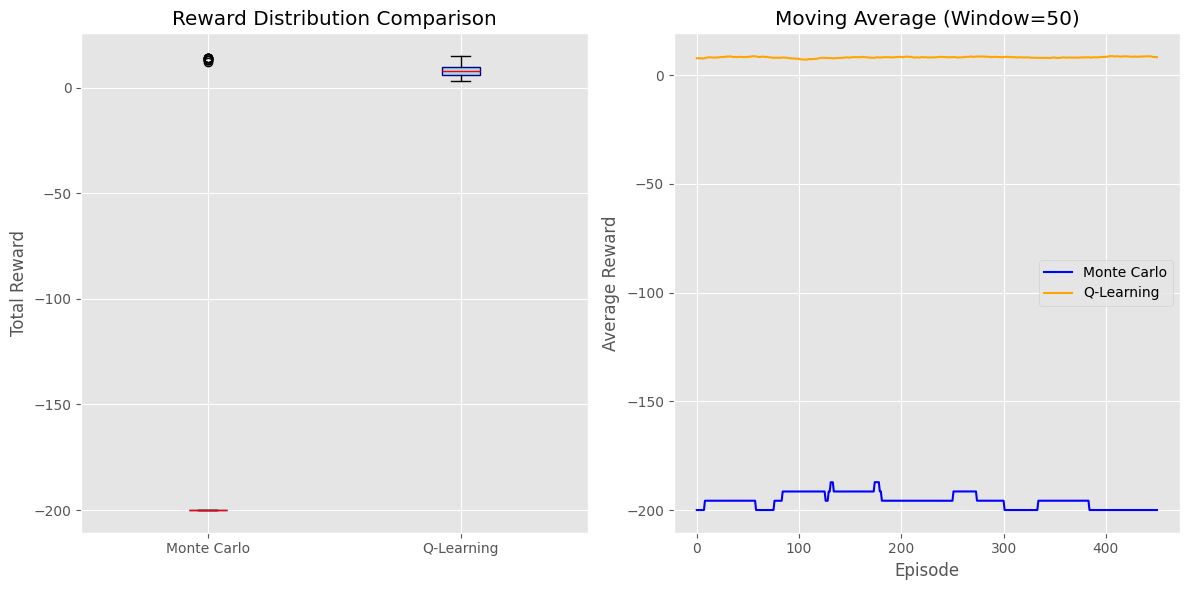

In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Set valid matplotlib style (choose one from plt.style.available)
plt.style.use('ggplot')  # Valid alternatives: 'seaborn-v0_8', 'bmh', 'classic'

# ================== Policy Training Functions ==================

def monte_carlo_control(env, num_episodes=5000, gamma=0.99, epsilon=0.1):
    """Monte Carlo Control with Epsilon-Greedy Exploration"""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)
    
    for episode in range(num_episodes):
        state, _ = env.reset()
        episode_data = []
        done = False
        
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            episode_data.append((state, action, reward))
            state = next_state

        G = 0
        returns_to_go = []
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            returns_to_go.insert(0, G)
            
        visited = set()
        for t in range(len(episode_data)):
            state, action, _ = episode_data[t]
            sa = (state, action)
            if sa not in visited:
                visited.add(sa)
                returns[sa].append(returns_to_go[t])
                Q[state][action] = np.mean(returns[sa])
                
    return {s: np.argmax(Q[s]) for s in Q}

def q_learning(env, num_episodes=5000, gamma=0.99, alpha=0.1, epsilon=0.1):
    """Q-Learning with Epsilon-Greedy Exploration"""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Q-Value update
            td_target = reward + gamma * np.max(Q[next_state])
            Q[state][action] += alpha * (td_target - Q[state][action])
            state = next_state
    
    return {s: np.argmax(Q[s]) for s in Q}

# ================== Visualization Functions ==================

def plot_comparison(mc_rewards, ql_rewards):
    """Comparative analysis of algorithm performance"""
    plt.figure(figsize=(12, 6))
    
    # Boxplot comparison
    plt.subplot(1, 2, 1)
    plt.boxplot([mc_rewards, ql_rewards], 
                labels=['Monte Carlo', 'Q-Learning'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='darkblue'),
                medianprops=dict(color='red'))
    plt.title('Reward Distribution Comparison')
    plt.ylabel('Total Reward')
    
    # Line plot of cumulative rewards
    plt.subplot(1, 2, 2)
    window_size = 50
    mc_cumulative = np.convolve(mc_rewards, np.ones(window_size)/window_size, mode='valid')
    ql_cumulative = np.convolve(ql_rewards, np.ones(window_size)/window_size, mode='valid')
    
    plt.plot(mc_cumulative, label='Monte Carlo', color='blue')
    plt.plot(ql_cumulative, label='Q-Learning', color='orange')
    plt.title(f'Moving Average (Window={window_size})')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# ================== Main Execution ==================

if __name__ == "__main__":
    env = gym.make("Taxi-v3")
    
    # Train policies
    print("Training Monte Carlo Control...")
    mc_policy = monte_carlo_control(env)
    print("Training Q-Learning...")
    ql_policy = q_learning(env)
    
    # Evaluate policies
    num_eval_episodes = 500
    mc_rewards = evaluate_policy(env, mc_policy, num_eval_episodes)
    ql_rewards = evaluate_policy(env, ql_policy, num_eval_episodes)
    
    # Print statistics
    print(f"\nMonte Carlo Results (n={num_eval_episodes}):")
    print(f"Average: {np.mean(mc_rewards):.2f}")
    print(f"Std Dev: {np.std(mc_rewards):.2f}")
    print(f"Max: {np.max(mc_rewards)}")
    print(f"Min: {np.min(mc_rewards)}")
    
    print(f"\nQ-Learning Results (n={num_eval_episodes}):")
    print(f"Average: {np.mean(ql_rewards):.2f}")
    print(f"Std Dev: {np.std(ql_rewards):.2f}")
    print(f"Max: {np.max(ql_rewards)}")
    print(f"Min: {np.min(ql_rewards)}")
    
    # Generate comparison plots
    plot_comparison(mc_rewards, ql_rewards)